### Download


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 86.5 MB/s eta 0:00:00
   ━━━

In [ ]:
!mkdir -p ~/.kaggle

# Move kaggle.json to the correct folder
!mv kaggle.json ~/.kaggle/
!kaggle competitions download -c hearth-disease-recognition
!mkdir -p /content/kaggle_competition

  0% 0.00/4.30M [00:00<?, ?B/s]
100% 4.30M/4.30M [00:00<00:00, 106MB/s]


In [ ]:
# Unzip the dataset into the directory
!unzip -q hearth-disease-recognition.zip -d /content/kaggle_competition

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_csv("/content/kaggle_competition/train.csv")
test_df = pd.read_csv("/content/kaggle_competition/test.csv")

In [ ]:
train_df

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes
1,train_000002,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No
2,train_000003,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes
3,train_000004,No,Yes,No,Yes,27.01,No,No,No,Yes,No,Yes,No,Good,No,Female,Some high school,"$35,000 to less than $50,000",74,Yes
4,train_000005,NaN,Yes,Yes,Yes,34.56,Yes,No,No,Yes,No,Yes,Yes,Very Poor,Yes,Male,Some high school,"$15,000 to less than $20,000",98,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223079,train_223080,No,No,No,Yes,28.20,No,No,No,No,No,Yes,No,Excellent,No,Female,College graduate,"$25,000 to less than $35,000",34,Yes
223080,train_223081,No,Yes,Yes,Yes,45.01,No,No,No,No,No,Yes,No,Fair,No,Male,College graduate,"$50,000 to less than $75,000",43,Yes
223081,train_223082,No,Yes,Yes,Yes,18.94,No,No,Yes,No,No,Yes,No,Poor,Yes,Female,Elementary,"$20,000 to less than $25,000",72,No
223082,train_223083,No,No,No,Yes,29.29,No,No,No,Yes,No,Yes,No,Excellent,No,Female,Some college or technical school,"($10,000 to less than $15,000",28,Yes


In [ ]:
test_df

,ID,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,test_000001,Yes,Yes,Yes,24.84,No,No,No,Yes,No,Yes,No,Good,No,Female,Some college or technical school,"$20,000 to less than $25,000",71,Yes
1,test_000002,Yes,No,Yes,29.08,Yes,No,No,No,No,Yes,No,Fair,No,Female,College graduate,"$50,000 to less than $75,000",61,No
2,test_000003,Yes,Yes,Yes,35.23,Yes,No,No,No,No,Yes,No,Fair,Yes,Female,Some college or technical school,"Less than $10,000",67,Yes
3,test_000004,No,No,Yes,24.78,Yes,No,No,No,No,Yes,No,Fair,No,Female,Some college or technical school,"$50,000 to less than $75,000",50,Yes
4,test_000005,No,No,Yes,27.57,Yes,No,No,No,No,Yes,No,Fair,No,Male,Some college or technical school,"$25,000 to less than $35,000",40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74356,test_074357,Yes,No,Yes,22.85,No,No,No,No,No,Yes,No,Fair,No,Female,Some college or technical school,"($10,000 to less than $15,000",47,Yes
74357,test_074358,Yes,Yes,Yes,28.27,Yes,No,No,No,No,Yes,No,Fair,No,Female,High school graduate,"$50,000 to less than $75,000",71,Yes
74358,test_074359,Yes,Yes,Yes,25.88,No,No,Yes,No,No,Yes,No,Very Poor,Yes,Female,College graduate,"$20,000 to less than $25,000",90,Yes
74359,test_074360,Yes,Yes,Yes,23.74,No,Yes,No,No,No,Yes,Yes,Poor,No,Male,Some high school,"($10,000 to less than $15,000",59,No


### Clean Data

In [ ]:
train_df.iloc[0:20]

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes
1,train_000002,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No
2,train_000003,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes
3,train_000004,No,Yes,No,Yes,27.01,No,No,No,Yes,No,Yes,No,Good,No,Female,Some high school,"$35,000 to less than $50,000",74,Yes
4,train_000005,NaN,Yes,Yes,Yes,34.56,Yes,No,No,Yes,No,Yes,Yes,Very Poor,Yes,Male,Some high school,"$15,000 to less than $20,000",98,Yes
5,train_000006,No,Yes,Yes,Yes,25.11,Yes,No,No,Yes,No,Yes,No,Good,No,Male,College graduate,"$75,000 or more",67,Yes
6,train_000007,No,Yes,Yes,Yes,24.34,Yes,No,No,Yes,No,Yes,No,Fair,Yes,Female,High school graduate,"$20,000 to less than $25,000",72,Yes
7,train_000008,Yes,Yes,Yes,Yes,29.84,Yes,No,Yes,No,No,Yes,No,Very Poor,Yes,Female,Some college or technical school,"Less than $10,000",64,Yes
8,train_000009,No,No,No,Yes,24.14,No,No,No,No,No,Yes,No,Good,No,Male,High school graduate,"$15,000 to less than $20,000",59,Yes
9,train_000010,No,No,No,Yes,24.77,Yes,No,Yes,Yes,No,Yes,No,Fair,No,Male,College graduate,"$75,000 or more",90,Yes


In [ ]:
train_df.nunique()

,0
ID,223084
History of HeartDisease or Attack,2
High Blood Pressure,2
Told High Cholesterol,2
Cholesterol Checked,2
Body Mass Index,4907
Smoked 100+ Cigarettes,2
Diagnosed Stroke,2
Diagnosed Diabetes,2
Leisure Physical Activity,2


In [ ]:
train_df.isnull().sum()

,0
ID,0
History of HeartDisease or Attack,1694
High Blood Pressure,0
Told High Cholesterol,32186
Cholesterol Checked,0
Body Mass Index,11782
Smoked 100+ Cigarettes,1
Diagnosed Stroke,0
Diagnosed Diabetes,3
Leisure Physical Activity,0


In [ ]:
train_df = train_df.dropna(subset=["History of HeartDisease or Attack"])

train_df.isnull().sum()

,0
ID,0
History of HeartDisease or Attack,0
High Blood Pressure,0
Told High Cholesterol,32043
Cholesterol Checked,0
Body Mass Index,11725
Smoked 100+ Cigarettes,1
Diagnosed Stroke,0
Diagnosed Diabetes,3
Leisure Physical Activity,0


In [ ]:
test_df.isnull().sum()

,0
ID,0
High Blood Pressure,0
Told High Cholesterol,0
Cholesterol Checked,0
Body Mass Index,0
Smoked 100+ Cigarettes,0
Diagnosed Stroke,0
Diagnosed Diabetes,0
Leisure Physical Activity,0
Heavy Alcohol Consumption,0


In [ ]:
columns_to_drop_na = [
    "Smoked 100+ Cigarettes",
    "Diagnosed Diabetes",
    "Doctor Visit Cost Barrier",
    "General Health",
    "Difficulty Walking"
]

train_df = train_df.dropna(subset=columns_to_drop_na)

# Verify that NaN values in selected columns are removed
print(train_df.isnull().sum())


ID                                            0
History of HeartDisease or Attack             0
High Blood Pressure                           0
Told High Cholesterol                     32042
Cholesterol Checked                           0
Body Mass Index                           11725
Smoked 100+ Cigarettes                        0
Diagnosed Stroke                              0
Diagnosed Diabetes                            0
Leisure Physical Activity                     0
Heavy Alcohol Consumption                     0
Health Care Coverage                          0
Doctor Visit Cost Barrier                     0
General Health                                0
Difficulty Walking                            0
Sex                                           0
Education Level                               0
Income Level                                  0
Age                                           0
Vegetable or Fruit Intake (1+ per Day)        0
dtype: int64


###Lebel Transform

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
columns_to_encode = [
    "High Blood Pressure",
    "Cholesterol Checked",
    "Smoked 100+ Cigarettes",
    "Diagnosed Stroke",
    "Diagnosed Diabetes",
    "Leisure Physical Activity",
    "Heavy Alcohol Consumption",
    "Health Care Coverage",
    "Doctor Visit Cost Barrier",
    "General Health",
    "Difficulty Walking",
    "Education Level",
    "Vegetable or Fruit Intake (1+ per Day)"
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to specified columns
for col in columns_to_encode:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col]) #1 is Yes ,0 is No

In [ ]:
train_df[:20]

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,No,1,Yes,1,40.68,1,0,0,0,0,1,0,4,1,Female,2,"$15,000 to less than $20,000",64,1
1,train_000002,No,0,No,0,24.36,1,0,0,1,0,0,1,1,0,Female,0,"Less than $10,000",50,0
2,train_000003,No,1,Yes,1,27.33,0,0,0,0,0,1,1,4,1,Female,2,"$75,000 or more",61,1
3,train_000004,No,1,No,1,27.01,0,0,0,1,0,1,0,2,0,Female,5,"$35,000 to less than $50,000",74,1
5,train_000006,No,1,Yes,1,25.11,1,0,0,1,0,1,0,2,0,Male,0,"$75,000 or more",67,1
6,train_000007,No,1,Yes,1,24.34,1,0,0,1,0,1,0,1,1,Female,2,"$20,000 to less than $25,000",72,1
7,train_000008,Yes,1,Yes,1,29.84,1,0,1,0,0,1,0,4,1,Female,4,"Less than $10,000",64,1
8,train_000009,No,0,No,1,24.14,0,0,0,0,0,1,0,2,0,Male,2,"$15,000 to less than $20,000",59,1
9,train_000010,No,0,No,1,24.77,1,0,1,1,0,1,0,1,0,Male,0,"$75,000 or more",90,1
10,train_000011,No,0,NaN,0,50.64,0,0,0,0,0,0,1,3,1,Male,2,"($10,000 to less than $15,000",53,0


###Combine DF

In [ ]:
train_check = train_df.drop('History of HeartDisease or Attack', axis=1)
check_df = pd.concat([train_check, test_df], axis=0)
check_df.dropna(inplace = True)
check_df.nunique()

,0
ID,253680
High Blood Pressure,2
Told High Cholesterol,2
Cholesterol Checked,2
Body Mass Index,5043
Smoked 100+ Cigarettes,2
Diagnosed Stroke,2
Diagnosed Diabetes,2
Leisure Physical Activity,2
Heavy Alcohol Consumption,2


###Income

In [ ]:
print(check_df['Income Level'].unique())

['$15,000 to less than $20,000' 'Less than $10,000' '$75,000 or more'
 '$35,000 to less than $50,000' '$20,000 to less than $25,000'
 '($10,000 to less than $15,000' '$50,000 to less than $75,000'
 '$25,000 to less than $35,000']


In [ ]:
# Define the mapping dictionary
income_mapping = {
    '$15,000 to less than $20,000': 20000,
    'Less than $10,000': 10000,
    '$75,000 or more': 100000,
    '$35,000 to less than $50,000': 50000,
    '$20,000 to less than $25,000': 20000,
    '($10,000 to less than $15,000': 10000,  # Ensure correct formatting of parentheses
    '$50,000 to less than $75,000': 75000,
    '$25,000 to less than $35,000': 35000
}

train_df['Income Level'] = train_df['Income Level'].replace(income_mapping)
test_df['Income Level'] = test_df['Income Level'].replace(income_mapping)
check_df['Income Level'] = check_df['Income Level'].replace(income_mapping)

In [ ]:
train_df['Income Level'].unique()

array([ 20000,  10000, 100000,  50000,  75000,  35000])

###Education Level

In [ ]:
print(check_df['Education Level'].unique())

[2 0 5 4 1 3]


###Sex label and body mass fix


In [ ]:
le_gender = LabelEncoder()

check_df['Sex'] = le_gender.fit_transform(check_df['Sex'])
train_df['Sex'] = le_gender.fit_transform(train_df['Sex'])
test_df['Sex'] = le_gender.transform(test_df['Sex'])

train_df[0:5] #0female 1male

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,No,1,Yes,1,40.68,1,0,0,0,0,1,0,4,1,0,2,20000,64,1
1,train_000002,No,0,No,0,24.36,1,0,0,1,0,0,1,1,0,0,0,10000,50,0
2,train_000003,No,1,Yes,1,27.33,0,0,0,0,0,1,1,4,1,0,2,100000,61,1
3,train_000004,No,1,No,1,27.01,0,0,0,1,0,1,0,2,0,0,5,50000,74,1
5,train_000006,No,1,Yes,1,25.11,1,0,0,1,0,1,0,2,0,1,0,100000,67,1


In [ ]:
male_df = train_df[train_df['Sex'] == 1]
female_df = train_df[train_df['Sex'] == 0]

test_male_df = test_df[test_df['Sex'] == 1]
test_female_df = test_df[test_df['Sex'] == 0]

male_df = male_df.reset_index(drop=True)
female_df = female_df.reset_index(drop=True)

In [ ]:
male_df[0:3]

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000006,No,1,Yes,1,25.11,1,0,0,1,0,1,0,2,0,1,0,100000,67,1
1,train_000009,No,0,No,1,24.14,0,0,0,0,0,1,0,2,0,1,2,20000,59,1
2,train_000010,No,0,No,1,24.77,1,0,1,1,0,1,0,1,0,1,0,100000,90,1


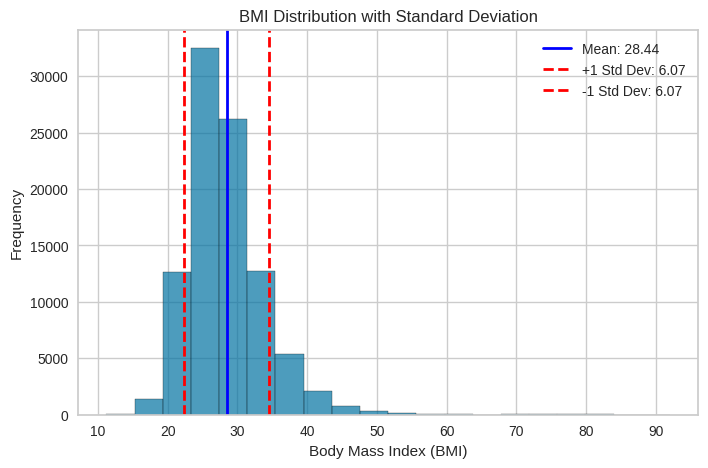

In [ ]:
import matplotlib.pyplot as plt

bmi_std = male_df['Body Mass Index'].std()

# Calculate the mean of BMI
bmi_mean = male_df['Body Mass Index'].mean()

# Create a new column showing how much each value deviates from the mean
male_df['BMI Deviation'] = male_df['Body Mass Index'] - bmi_mean

# Plot the standard deviation as a reference line on a histogram
plt.figure(figsize=(8,5))
plt.hist(male_df['Body Mass Index'], bins=20, alpha=0.7, edgecolor='black')
plt.axvline(bmi_mean, color='blue', linestyle='solid', linewidth=2, label=f'Mean: {bmi_mean:.2f}')
plt.axvline(bmi_mean + bmi_std, color='red', linestyle='dashed', linewidth=2, label=f'+1 Std Dev: {bmi_std:.2f}')
plt.axvline(bmi_mean - bmi_std, color='red', linestyle='dashed', linewidth=2, label=f'-1 Std Dev: {bmi_std:.2f}')

# Labels and title
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frequency')
plt.title('BMI Distribution with Standard Deviation')
plt.legend()

# Show plot
plt.show()

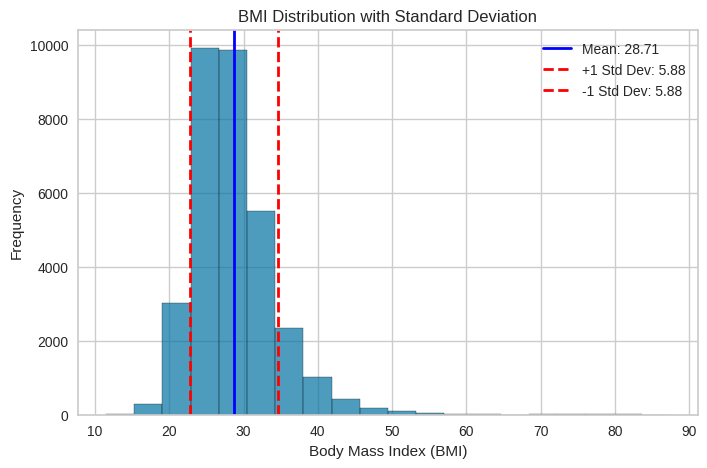

In [ ]:
bmi_std = test_male_df['Body Mass Index'].std()

# Calculate the mean of BMI
bmi_mean = test_male_df['Body Mass Index'].mean()

# Create a new column showing how much each value deviates from the mean
test_male_df['BMI Deviation'] = test_male_df['Body Mass Index'] - bmi_mean

# Plot the standard deviation as a reference line on a histogram
plt.figure(figsize=(8,5))
plt.hist(test_male_df['Body Mass Index'], bins=20, alpha=0.7, edgecolor='black')
plt.axvline(bmi_mean, color='blue', linestyle='solid', linewidth=2, label=f'Mean: {bmi_mean:.2f}')
plt.axvline(bmi_mean + bmi_std, color='red', linestyle='dashed', linewidth=2, label=f'+1 Std Dev: {bmi_std:.2f}')
plt.axvline(bmi_mean - bmi_std, color='red', linestyle='dashed', linewidth=2, label=f'-1 Std Dev: {bmi_std:.2f}')

# Labels and title
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frequency')
plt.title('BMI Distribution with Standard Deviation')
plt.legend()

# Show plot
plt.show()

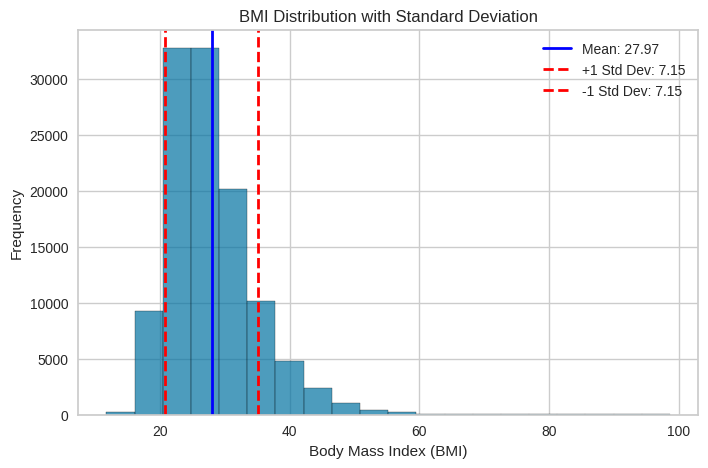

In [ ]:
bmi_std = female_df['Body Mass Index'].std()

# Calculate the mean of BMI
bmi_mean = female_df['Body Mass Index'].mean()

# Create a new column showing how much each value deviates from the mean
female_df['BMI Deviation'] = female_df['Body Mass Index'] - bmi_mean

# Plot the standard deviation as a reference line on a histogram
plt.figure(figsize=(8,5))
plt.hist(female_df['Body Mass Index'], bins=20, alpha=0.7, edgecolor='black')
plt.axvline(bmi_mean, color='blue', linestyle='solid', linewidth=2, label=f'Mean: {bmi_mean:.2f}')
plt.axvline(bmi_mean + bmi_std, color='red', linestyle='dashed', linewidth=2, label=f'+1 Std Dev: {bmi_std:.2f}')
plt.axvline(bmi_mean - bmi_std, color='red', linestyle='dashed', linewidth=2, label=f'-1 Std Dev: {bmi_std:.2f}')

# Labels and title
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frequency')
plt.title('BMI Distribution with Standard Deviation')
plt.legend()

# Show plot
plt.show()

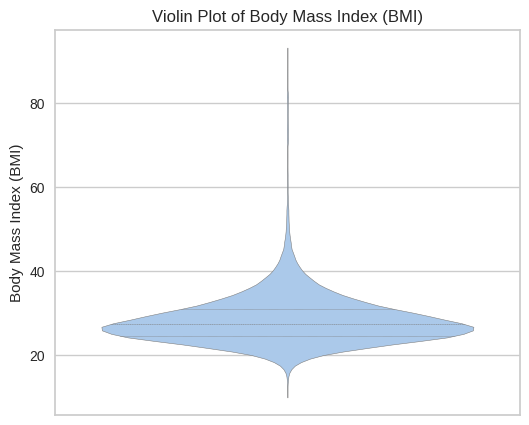

In [ ]:
import seaborn as sns

# Create a violin plot for the "Body Mass Index" column
plt.figure(figsize=(6, 5))
sns.violinplot(y=male_df['Body Mass Index'].dropna(), inner="quartile", palette="pastel")

# Labels and title
plt.ylabel('Body Mass Index (BMI)')
plt.title('Violin Plot of Body Mass Index (BMI)')

# Show the plot
plt.show()

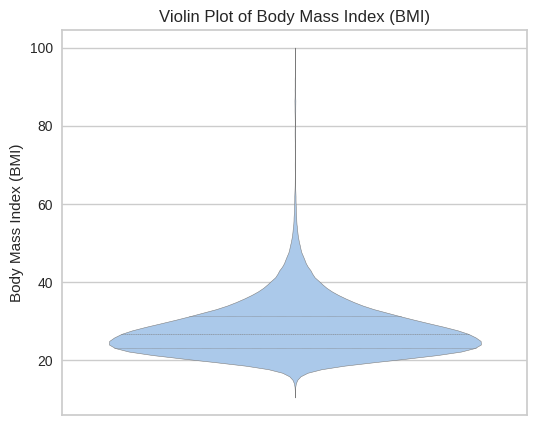

In [ ]:
plt.figure(figsize=(6, 5))
sns.violinplot(y=female_df['Body Mass Index'].dropna(), inner="quartile", palette="pastel")

# Labels and title
plt.ylabel('Body Mass Index (BMI)')
plt.title('Violin Plot of Body Mass Index (BMI)')

# Show the plot
plt.show()

In [ ]:
median = male_df['Body Mass Index'].mean()
print(f"Median BMI for Male: {median}")

Median BMI for Male: 28.442593519104925


In [ ]:
male_df['Body Mass Index'].fillna(male_df['Body Mass Index'].median(), inplace=True)
female_df['Body Mass Index'].fillna(female_df['Body Mass Index'].median(), inplace=True)

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
male_df = remove_outliers(male_df, "Body Mass Index")
female_df = remove_outliers(female_df, "Body Mass Index")

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler_male = RobustScaler()
male_df.loc[:, "BMI_scaled"] = scaler_male.fit_transform(male_df[["Body Mass Index"]])

scaler_female = RobustScaler()
female_df.loc[:, "BMI_scaled"] = scaler_female.fit_transform(female_df[["Body Mass Index"]])

test_male_df.loc[:, "BMI_scaled"] = scaler_male.transform(test_male_df[["Body Mass Index"]])
test_female_df.loc[:, "BMI_scaled"] = scaler_female.transform(test_female_df[["Body Mass Index"]])

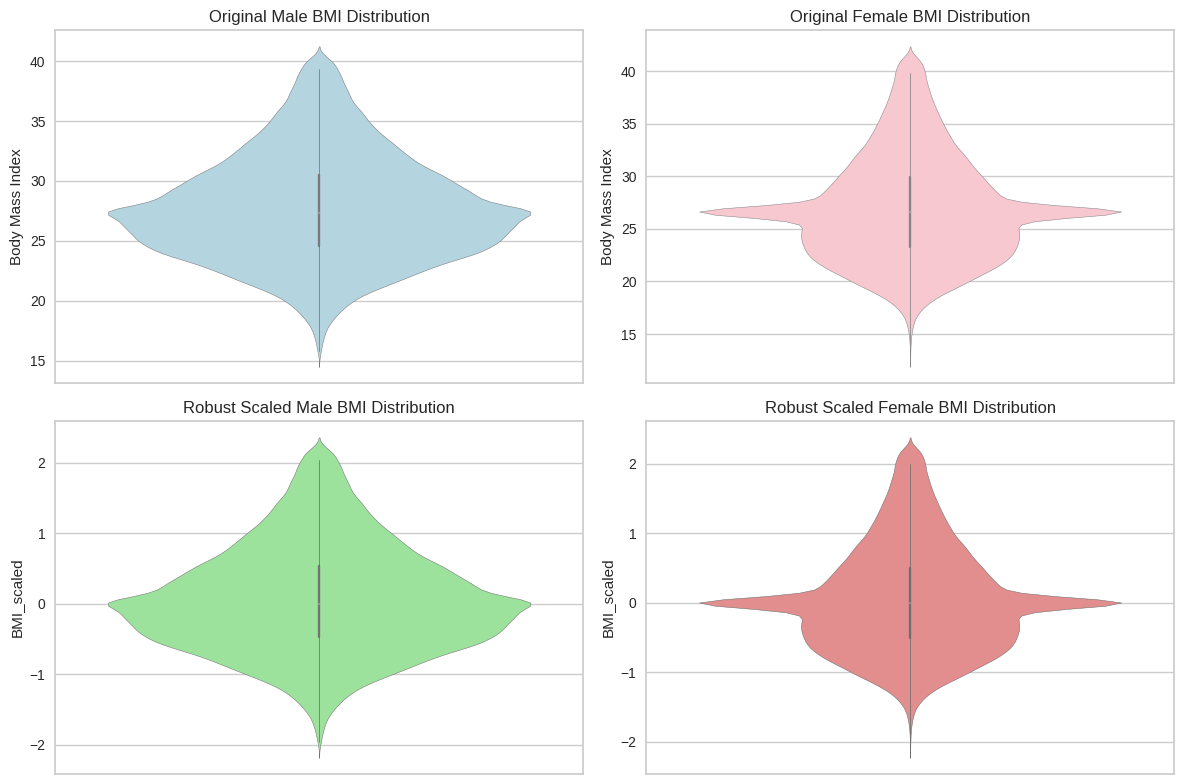

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original Distributions
sns.violinplot(y=male_df["Body Mass Index"], ax=axes[0, 0], color="lightblue")
axes[0, 0].set_title("Original Male BMI Distribution")

sns.violinplot(y=female_df["Body Mass Index"], ax=axes[0, 1], color="pink")
axes[0, 1].set_title("Original Female BMI Distribution")

# Scaled Distributions
sns.violinplot(y=male_df["BMI_scaled"], ax=axes[1, 0], color="lightgreen")
axes[1, 0].set_title("Robust Scaled Male BMI Distribution")

sns.violinplot(y=female_df["BMI_scaled"], ax=axes[1, 1], color="lightcoral")
axes[1, 1].set_title("Robust Scaled Female BMI Distribution")

plt.tight_layout()
plt.show()

In [ ]:
male_median = male_df["BMI_scaled"].median()
female_median = female_df["BMI_scaled"].median()

print(f"Median BMI for Male: {male_median}")
print(f"Median BMI for Female: {female_median}")

Median BMI for Male: 0.0
Median BMI for Female: 0.0


In [ ]:
BMI_df = pd.concat([male_df, female_df], axis=0)
test_BMI_df = pd.concat([test_male_df, test_female_df], axis=0)

In [ ]:
train_df["BMI_scaled"] = train_df["ID"].map(BMI_df.set_index("ID")["BMI_scaled"])
test_df["BMI_scaled"] = test_df["ID"].map(test_BMI_df.set_index("ID")["BMI_scaled"])

In [ ]:
BMI_df[0:5]

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,...,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),BMI Deviation,BMI_scaled
0,train_000006,No,1,Yes,1,25.11,1,0,0,1,...,0,2,0,1,0,100000,67,1,-3.332594,-0.378608
1,train_000009,No,0,No,1,24.14,0,0,0,0,...,0,2,0,1,2,20000,59,1,-4.302594,-0.543294
2,train_000010,No,0,No,1,24.77,1,0,1,1,...,0,1,0,1,0,100000,90,1,-3.672594,-0.436333
5,train_000018,No,0,No,1,23.00,1,0,1,1,...,0,2,0,1,4,50000,54,0,-5.442594,-0.736842
6,train_000021,No,0,Yes,1,28.76,0,0,0,0,...,0,2,0,1,0,100000,37,0,0.317406,0.241087


In [ ]:
train_df[0:20]

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,...,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),BMI_scaled
0,train_000001,No,1,Yes,1,40.68,1,0,0,0,...,1,0,4,1,0,2,20000,64,1,2.128788
1,train_000002,No,0,No,0,24.36,1,0,0,1,...,0,1,1,0,0,0,10000,50,0,-0.343939
2,train_000003,No,1,Yes,1,27.33,0,0,0,0,...,1,1,4,1,0,2,100000,61,1,0.106061
3,train_000004,No,1,No,1,27.01,0,0,0,1,...,1,0,2,0,0,5,50000,74,1,0.057576
5,train_000006,No,1,Yes,1,25.11,1,0,0,1,...,1,0,2,0,1,0,100000,67,1,-0.378608
6,train_000007,No,1,Yes,1,24.34,1,0,0,1,...,1,0,1,1,0,2,20000,72,1,-0.346970
7,train_000008,Yes,1,Yes,1,29.84,1,0,1,0,...,1,0,4,1,0,4,10000,64,1,0.486364
8,train_000009,No,0,No,1,24.14,0,0,0,0,...,1,0,2,0,1,2,20000,59,1,-0.543294
9,train_000010,No,0,No,1,24.77,1,0,1,1,...,1,0,1,0,1,0,100000,90,1,-0.436333
10,train_000011,No,0,NaN,0,50.64,0,0,0,0,...,0,1,3,1,1,2,10000,53,0,NaN


In [ ]:
train_df.isnull().sum()

,0
ID,0
History of HeartDisease or Attack,0
High Blood Pressure,0
Told High Cholesterol,32042
Cholesterol Checked,0
Body Mass Index,11725
Smoked 100+ Cigarettes,0
Diagnosed Stroke,0
Diagnosed Diabetes,0
Leisure Physical Activity,0


###Correlation


In [ ]:
train_df.isnull().sum()

,0
ID,0
History of HeartDisease or Attack,0
High Blood Pressure,0
Told High Cholesterol,32042
Cholesterol Checked,0
Body Mass Index,11725
Smoked 100+ Cigarettes,0
Diagnosed Stroke,0
Diagnosed Diabetes,0
Leisure Physical Activity,0


In [ ]:
train_df_correlation = train_df.dropna()

In [ ]:
le_cholesterol = LabelEncoder()
le_history = LabelEncoder()

train_df_correlation['History of HeartDisease or Attack'] = le_history.fit_transform(train_df_correlation['History of HeartDisease or Attack'])
train_df_correlation['Told High Cholesterol'] = le_cholesterol.fit_transform(train_df_correlation['Told High Cholesterol'])

In [ ]:
train_df_correlation

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,...,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),BMI_scaled
0,train_000001,0,1,1,1,40.68,1,0,0,0,...,1,0,4,1,0,2,20000,64,1,2.128788
1,train_000002,0,0,0,0,24.36,1,0,0,1,...,0,1,1,0,0,0,10000,50,0,-0.343939
2,train_000003,0,1,1,1,27.33,0,0,0,0,...,1,1,4,1,0,2,100000,61,1,0.106061
3,train_000004,0,1,0,1,27.01,0,0,0,1,...,1,0,2,0,0,5,50000,74,1,0.057576
5,train_000006,0,1,1,1,25.11,1,0,0,1,...,1,0,2,0,1,0,100000,67,1,-0.378608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223077,train_223078,1,1,0,1,28.78,1,0,0,1,...,1,0,1,0,1,1,10000,78,1,0.244482
223079,train_223080,0,0,0,1,28.20,0,0,0,0,...,1,0,0,0,0,0,35000,34,1,0.237879
223081,train_223082,0,1,1,1,18.94,0,0,1,0,...,1,0,3,1,0,1,20000,72,0,-1.165152
223082,train_223083,0,0,0,1,29.29,0,0,0,1,...,1,0,0,0,0,4,10000,28,1,0.403030


                                        History of HeartDisease or Attack  \
History of HeartDisease or Attack                                1.000000   
High Blood Pressure                                              0.211688   
Told High Cholesterol                                            0.181678   
Cholesterol Checked                                              0.044185   
Body Mass Index                                                  0.057685   
Smoked 100+ Cigarettes                                           0.116106   
Diagnosed Stroke                                                 0.203346   
Diagnosed Diabetes                                               0.168756   
Leisure Physical Activity                                       -0.084331   
Heavy Alcohol Consumption                                       -0.029417   
Health Care Coverage                                             0.018860   
Doctor Visit Cost Barrier                                        0.030523   

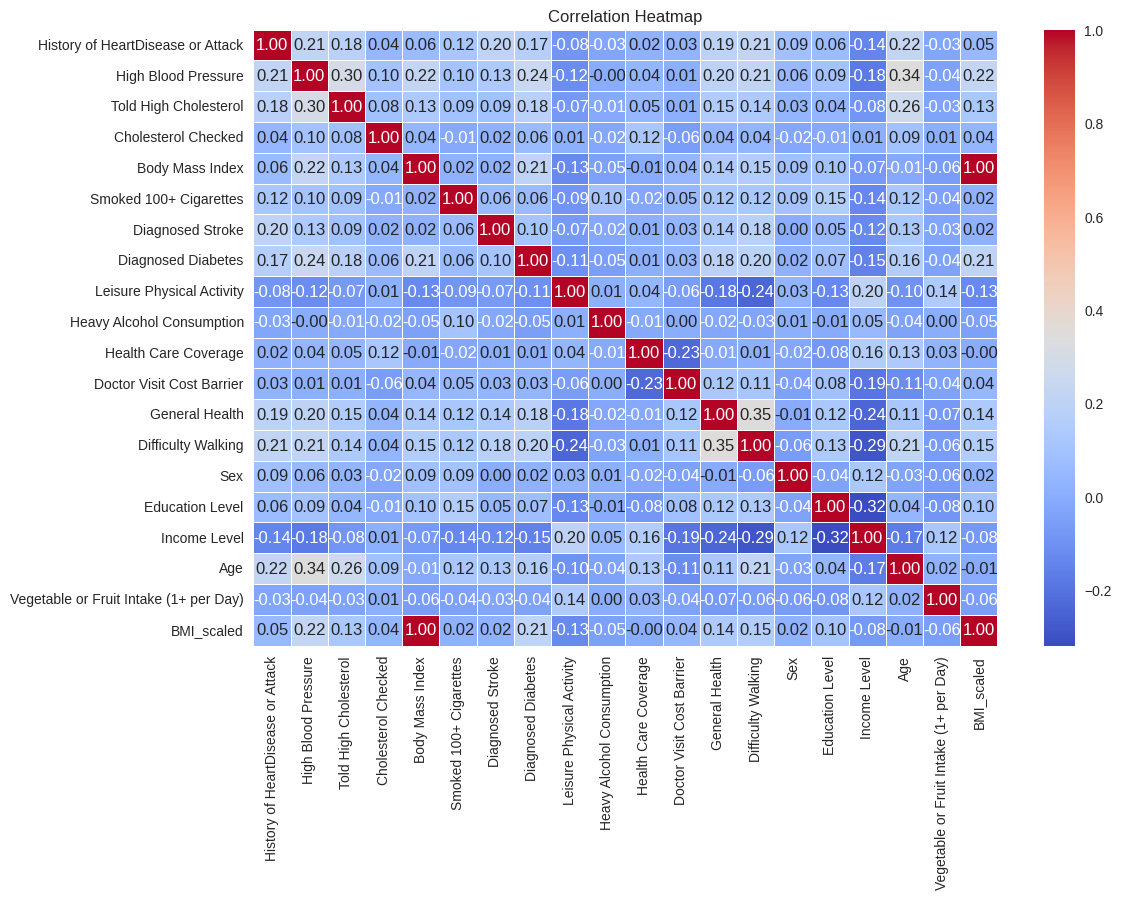

In [ ]:
columns_to_check = [
    "History of HeartDisease or Attack", "High Blood Pressure", "Told High Cholesterol",
    "Cholesterol Checked", "Body Mass Index", "Smoked 100+ Cigarettes", "Diagnosed Stroke", "Diagnosed Diabetes",
    "Leisure Physical Activity", "Heavy Alcohol Consumption", "Health Care Coverage",
    "Doctor Visit Cost Barrier", "General Health", "Difficulty Walking", "Sex", "Education Level",
    "Income Level", "Age", "Vegetable or Fruit Intake (1+ per Day)", "BMI_scaled"
]

# Compute the correlation matrix
correlation_matrix = train_df_correlation[columns_to_check].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

###High Cholesterold


In [ ]:
cholesterol_df = train_df.dropna()

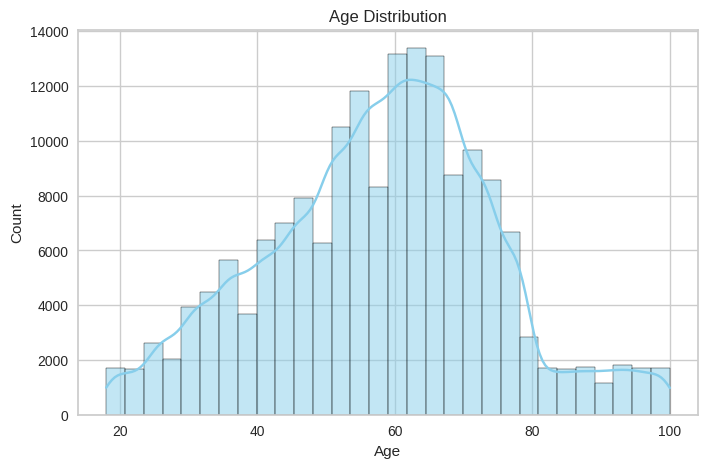

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(cholesterol_df["Age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:
print(cholesterol_df["Age"].min())
print(cholesterol_df["Age"].max())

18
100


In [ ]:
q1 = cholesterol_df["Age"].quantile(0.25)  # 25th percentile (Q1)
q2 = cholesterol_df["Age"].quantile(0.50)  # 50th percentile (Median, Q2)
q3 = cholesterol_df["Age"].quantile(0.75)  # 75th percentile (Q3)
q4 = cholesterol_df["Age"].max()  # Max value (100%)

print(f"Q1 (25th percentile): {q1}")
print(f"Q2 (50th percentile / Median): {q2}")
print(f"Q3 (75th percentile): {q3}")
print(f"Q4 (Max value): {q4}")


Q1 (25th percentile): 47.0
Q2 (50th percentile / Median): 59.0
Q3 (75th percentile): 69.0
Q4 (Max value): 100


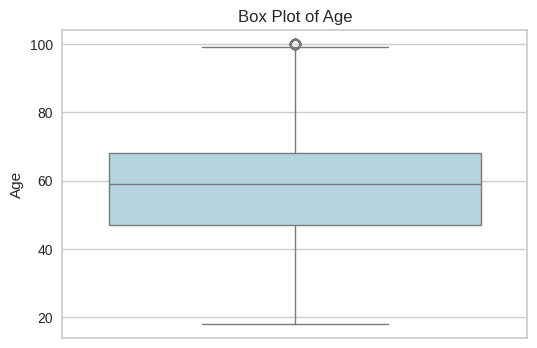

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=check_df["Age"], color="lightblue")

plt.title("Box Plot of Age")
plt.ylabel("Age")
plt.show()

In [ ]:
cholesterol_df['History of HeartDisease or Attack'] = le_history.fit_transform(cholesterol_df['History of HeartDisease or Attack'])

In [ ]:
cholesterol_df['Told High Cholesterol'] = le_cholesterol.fit_transform(cholesterol_df['Told High Cholesterol'])

Told High Cholesterol                1.000000
High Blood Pressure                  0.298803
Age                                  0.264068
History of HeartDisease or Attack    0.181678
Difficulty Walking                   0.139166
BMI_scaled                           0.128259
Name: Told High Cholesterol, dtype: float64


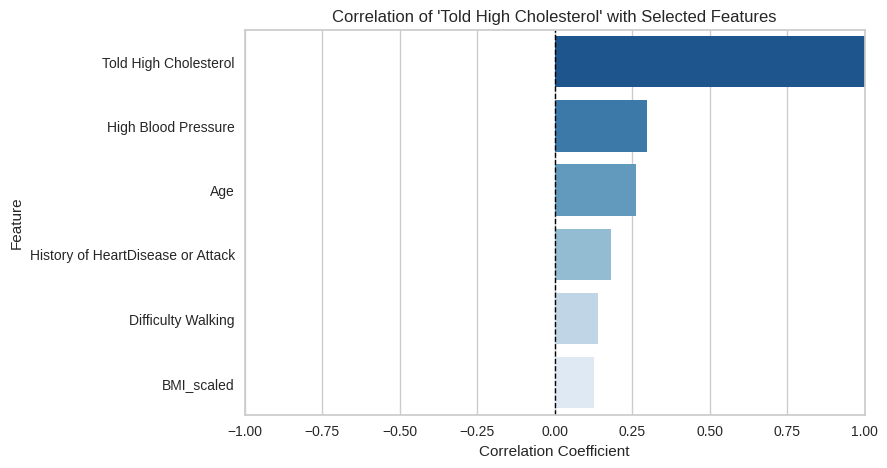

In [ ]:
columns_to_check = ["Told High Cholesterol", "High Blood Pressure", "History of HeartDisease or Attack", "BMI_scaled", "Age", "Difficulty Walking"]

# Compute correlation of "Told High Cholesterol" with selected columns
cholesterol_correlation_selected = cholesterol_df[columns_to_check].corr()["Told High Cholesterol"].sort_values(ascending=False)

# Display correlation values
print(cholesterol_correlation_selected)

# Plot correlation as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=cholesterol_correlation_selected.values, y=cholesterol_correlation_selected.index, palette="Blues_r")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.title("Correlation of 'Told High Cholesterol' with Selected Features")
plt.xlim(-1, 1)  # Correlation values range from -1 to 1
plt.axvline(x=0, color="black", linestyle="--", linewidth=1)  # Add a vertical line at zero

# Show the plot
plt.show()

In [ ]:
dfQ1 = cholesterol_df[cholesterol_df["Age"] < 47]
dfQ2 = cholesterol_df[(cholesterol_df["Age"] >= 47) & (cholesterol_df["Age"] < 59)]
dfQ3 = cholesterol_df[(cholesterol_df["Age"] >= 59) & (cholesterol_df["Age"] < 69)]
dfQ4 = cholesterol_df[cholesterol_df["Age"] >= 69]

In [ ]:
dfQ1[:5]

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,...,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),BMI_scaled
14,train_000015,0,0,1,1,33.59,1,1,0,1,...,1,1,3,0,0,0,10000,35,1,1.054545
15,train_000016,0,1,0,1,32.29,0,0,0,1,...,1,0,2,0,0,0,100000,46,0,0.857576
18,train_000019,0,0,0,0,22.76,0,0,0,0,...,1,0,2,0,0,0,75000,29,1,-0.586364
20,train_000021,0,0,1,1,28.76,0,0,0,0,...,1,0,2,0,1,0,100000,37,0,0.241087
26,train_000027,0,0,0,1,31.36,0,0,0,1,...,1,0,2,0,0,0,100000,42,1,0.716667


In [ ]:
def percentHighCholesterolYes(df, column="Told High Cholesterol"):
  total_count = df[column].count()  # Total non-null values
  yes_count = df[column].sum()  # Sum of 1s (since 1 represents 'Yes')

  if total_count == 0:
      return 0  # Avoid division by zero

  yes_percentage = (yes_count / total_count) * 100
  return round(yes_percentage, 2)

In [ ]:
print(percentHighCholesterolYes(dfQ1))
print(percentHighCholesterolYes(dfQ2))
print(percentHighCholesterolYes(dfQ3))
print(percentHighCholesterolYes(dfQ4))

20.33
39.85
51.86
55.27


In [ ]:
def calculate_cholesterol_percentages(df):
    # Check the percentage where High Blood Pressure = 1 and Told High Cholesterol = 1
    high_bp_total = df[df["High Blood Pressure"] == 1].shape[0]
    high_bp_cholesterol = df[(df["High Blood Pressure"] == 1) & (df["Told High Cholesterol"] == 1)].shape[0]
    percent_high_bp_cholesterol = (high_bp_cholesterol / high_bp_total) * 100 if high_bp_total > 0 else 0

    # Check the percentage where High Blood Pressure = 1 and Heart Disease = 1, then Told High Cholesterol = 1
    heart_disease_bp_total = df[(df["High Blood Pressure"] == 1) & (df["History of HeartDisease or Attack"] == 1)].shape[0]
    heart_disease_bp_cholesterol = df[(df["High Blood Pressure"] == 1) &
                                      (df["History of HeartDisease or Attack"] == 1) &
                                      (df["Told High Cholesterol"] == 1)].shape[0]
    percent_heart_disease_bp_cholesterol = (heart_disease_bp_cholesterol / heart_disease_bp_total) * 100 if heart_disease_bp_total > 0 else 0

    # Create a DataFrame to store the results
    result_df = pd.DataFrame({
        "Condition": [
            "High Blood Pressure = 1 → Told High Cholesterol = 1",
            "Heart Disease = 1 & High Blood Pressure = 1 → Told High Cholesterol = 1"
        ],
        "Percentage": [
            percent_high_bp_cholesterol,
            percent_heart_disease_bp_cholesterol
        ]
    })

    return result_df

In [ ]:
dfQ1_corr = calculate_cholesterol_percentages(dfQ1)
dfQ2_corr = calculate_cholesterol_percentages(dfQ2)
dfQ3_corr = calculate_cholesterol_percentages(dfQ3)
dfQ4_corr = calculate_cholesterol_percentages(dfQ4)

print(dfQ1_corr)
print(dfQ2_corr)
print(dfQ3_corr)
print(dfQ4_corr)

                                           Condition  Percentage
0  High Blood Pressure = 1 → Told High Cholestero...   41.093203
1  Heart Disease = 1 & High Blood Pressure = 1 → ...   68.229167
                                           Condition  Percentage
0  High Blood Pressure = 1 → Told High Cholestero...   55.155288
1  Heart Disease = 1 & High Blood Pressure = 1 → ...   76.398279
                                           Condition  Percentage
0  High Blood Pressure = 1 → Told High Cholestero...   62.761281
1  Heart Disease = 1 & High Blood Pressure = 1 → ...   79.268636
                                           Condition  Percentage
0  High Blood Pressure = 1 → Told High Cholestero...   64.011692
1  Heart Disease = 1 & High Blood Pressure = 1 → ...   75.059158


In [ ]:
train_df['History of HeartDisease or Attack'] = le_history.fit_transform(train_df['History of HeartDisease or Attack'])
train_df['Told High Cholesterol'] = le_cholesterol.fit_transform(train_df['Told High Cholesterol'])

test_df['Told High Cholesterol'] = le_cholesterol.fit_transform(test_df['Told High Cholesterol'])

In [ ]:
# Step 1: Replace values where "Told High Cholesterol" == 2 with NaN
train_df["Told High Cholesterol"].replace(2, np.nan, inplace=True)

train_df["Age Group"] = pd.qcut(train_df["Age"], q=4, labels=["<47", "47-59", "59-69", "69+"])

# Step 5: Compute Average Probability for Each Age Group
summary_percentages = {
    "<47": {"High Blood Pressure = 1": 41.087444, "Heart Disease & High BP = 1": 68.229167, "General": 20.33},
    "47-59": {"High Blood Pressure = 1": 55.151636, "Heart Disease & High BP = 1": 76.398279, "General": 39.85},
    "59-69": {"High Blood Pressure = 1": 62.766816, "Heart Disease & High BP = 1": 79.274466, "General": 51.86},
    "69+": {"High Blood Pressure = 1": 64.013006, "Heart Disease & High BP = 1": 75.063091, "General": 55.27}
}

# Step 6: Define function to impute missing values based on Age Quartile
def impute_cholesterol(row):
    if np.isnan(row["Told High Cholesterol"]):  # Check if value is missing
        age_group = row["Age Group"]

        # If both High Blood Pressure and Heart Disease = 1
        if row["High Blood Pressure"] == 1 and row["History of HeartDisease or Attack"] == 1:
            return 1 if np.random.rand() < (summary_percentages[age_group]["Heart Disease & High BP = 1"] / 100) else 0

        # If only High Blood Pressure = 1
        elif row["High Blood Pressure"] == 1:
            return 1 if np.random.rand() < (summary_percentages[age_group]["High Blood Pressure = 1"] / 100) else 0

        # If High Blood Pressure = 0, assign a general probability based on age group
        else:
            return 1 if np.random.rand() < (summary_percentages[age_group]["General"] / 100) else 0

    return row["Told High Cholesterol"]  # Keep existing values if not missing

# Step 5: Apply function to fill missing values
train_df["Told High Cholesterol"] = train_df.apply(impute_cholesterol, axis=1)

# Print updated DataFrame to verify changes
print(train_df.head())

             ID  History of HeartDisease or Attack  High Blood Pressure  \
0  train_000001                                  0                    1   
1  train_000002                                  0                    0   
2  train_000003                                  0                    1   
3  train_000004                                  0                    1   
5  train_000006                                  0                    1   

   Told High Cholesterol  Cholesterol Checked  Body Mass Index  \
0                    1.0                    1            40.68   
1                    0.0                    0            24.36   
2                    1.0                    1            27.33   
3                    0.0                    1            27.01   
5                    1.0                    1            25.11   

   Smoked 100+ Cigarettes  Diagnosed Stroke  Diagnosed Diabetes  \
0                       1                 0                   0   
1                 

In [ ]:
train_df.isnull().sum()

,0
ID,0
History of HeartDisease or Attack,0
High Blood Pressure,0
Told High Cholesterol,0
Cholesterol Checked,0
Body Mass Index,11725
Smoked 100+ Cigarettes,0
Diagnosed Stroke,0
Diagnosed Diabetes,0
Leisure Physical Activity,0


In [ ]:
train_df[:30]

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,...,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),BMI_scaled,Age Group
0,train_000001,0,1,1.0,1,40.68,1,0,0,0,...,0,4,1,0,2,20000,64,1,2.128788,59-69
1,train_000002,0,0,0.0,0,24.36,1,0,0,1,...,1,1,0,0,0,10000,50,0,-0.343939,47-59
2,train_000003,0,1,1.0,1,27.33,0,0,0,0,...,1,4,1,0,2,100000,61,1,0.106061,59-69
3,train_000004,0,1,0.0,1,27.01,0,0,0,1,...,0,2,0,0,5,50000,74,1,0.057576,69+
5,train_000006,0,1,1.0,1,25.11,1,0,0,1,...,0,2,0,1,0,100000,67,1,-0.378608,59-69
6,train_000007,0,1,1.0,1,24.34,1,0,0,1,...,0,1,1,0,2,20000,72,1,-0.346970,69+
7,train_000008,1,1,1.0,1,29.84,1,0,1,0,...,0,4,1,0,4,10000,64,1,0.486364,59-69
8,train_000009,0,0,0.0,1,24.14,0,0,0,0,...,0,2,0,1,2,20000,59,1,-0.543294,59-69
9,train_000010,0,0,0.0,1,24.77,1,0,1,1,...,0,1,0,1,0,100000,90,1,-0.436333,69+
10,train_000011,0,0,0.0,0,50.64,0,0,0,0,...,1,3,1,1,2,10000,53,0,NaN,47-59


#Feature

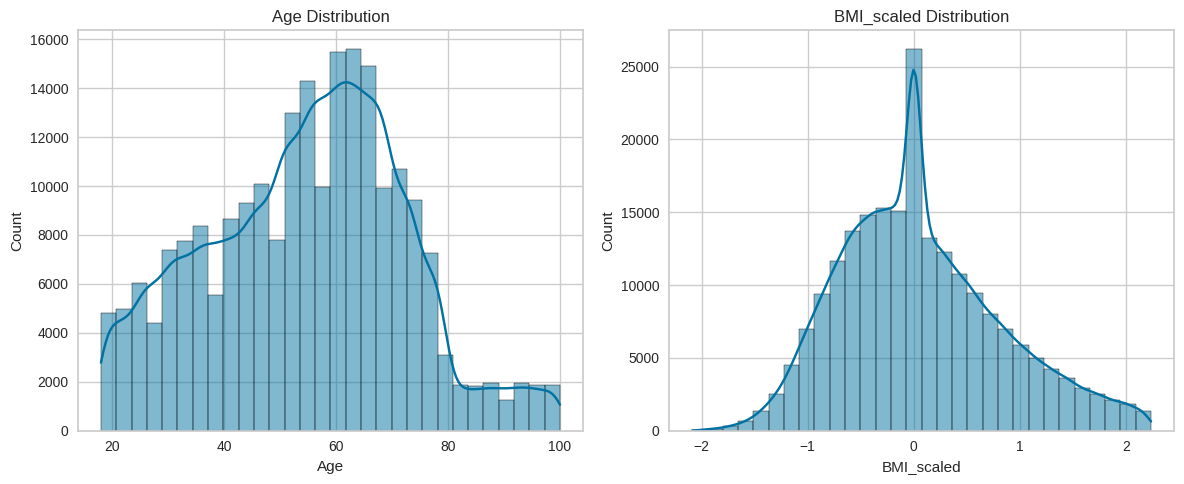

In [ ]:
plt.figure(figsize=(12, 5))

# Age Column Distribution
plt.subplot(1, 2, 1)
sns.histplot(train_df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

# BMI_scaled Column Distribution
plt.subplot(1, 2, 2)
sns.histplot(train_df["BMI_scaled"], bins=30, kde=True)
plt.title("BMI_scaled Distribution")
plt.xlabel("BMI_scaled")
plt.ylabel("Count")

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df["Age_standardized"] = scaler.fit_transform(train_df[["Age"]])
test_df["Age_standardized"] = scaler.transform(test_df[["Age"]])

Text(0, 0.5, 'Count')

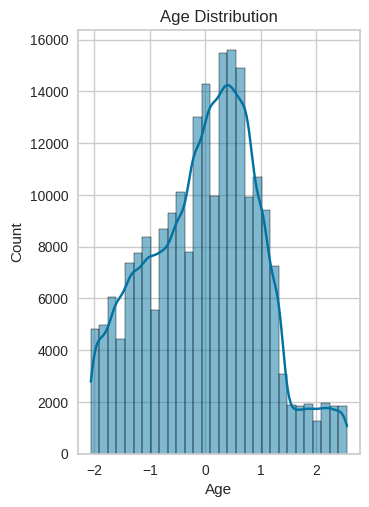

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(train_df["Age_standardized"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

In [ ]:
'''# List of columns to drop
columns_to_drop = [
    "Cholesterol Checked",
    "Smoked 100+ Cigarettes",
    "Diagnosed Diabetes",
    "Leisure Physical Activity",
    "Heavy Alcohol Consumption",
    "Health Care Coverage",
    "Doctor Visit Cost Barrier",
    "General Health",
    "Education Level",
    "Income Level",
    "Vegetable or Fruit Intake (1+ per Day)",
    "Age"
]

# Drop columns from both training and test datasets
train_df = train_df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)'''

'# List of columns to drop\ncolumns_to_drop = [\n    "Cholesterol Checked",\n    "Smoked 100+ Cigarettes",\n    "Diagnosed Diabetes",\n    "Leisure Physical Activity",\n    "Heavy Alcohol Consumption",\n    "Health Care Coverage",\n    "Doctor Visit Cost Barrier",\n    "General Health",\n    "Education Level",\n    "Income Level",\n    "Vegetable or Fruit Intake (1+ per Day)",\n    "Age"\n]\n\n# Drop columns from both training and test datasets\ntrain_df = train_df.drop(columns=columns_to_drop)\ntest_df = test_df.drop(columns=columns_to_drop)'

#Train ML

###Adjust format

In [ ]:
train_df[:2]

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,...,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),BMI_scaled,Age Group,Age_standardized
0,train_000001,0,1,1.0,1,40.68,1,0,0,0,...,4,1,0,2,20000,64,1,2.128788,59-69,0.525523
1,train_000002,0,0,0.0,0,24.36,1,0,0,1,...,1,0,0,0,10000,50,0,-0.343939,47-59,-0.262195


In [ ]:
test_df[:2]

,ID,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,...,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),BMI_scaled,Age_standardized
0,test_000001,1,1,1,24.84,0,0,0,1,0,...,0,2,0,0,4,20000,71,1,-0.271212,0.919382
1,test_000002,1,0,1,29.08,1,0,0,0,0,...,0,1,0,0,0,75000,61,0,0.371212,0.356726


In [ ]:
train_df = train_df.drop("Body Mass Index", axis=1)
test_df = test_df.drop("Body Mass Index", axis=1)

train_df = train_df.drop("ID", axis=1)
test_df = test_df.drop("ID", axis=1)

train_df = train_df.drop("Age", axis=1)
test_df = test_df.drop("Age", axis=1)

train_df = train_df.drop("Age Group", axis=1)

train_df_cleaned = train_df.dropna()

In [ ]:
train_df_cleaned

,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Vegetable or Fruit Intake (1+ per Day),BMI_scaled,Age_standardized
0,0,1,1.0,1,1,0,0,0,0,1,0,4,1,0,2,20000,1,2.128788,0.525523
1,0,0,0.0,0,1,0,0,1,0,0,1,1,0,0,0,10000,0,-0.343939,-0.262195
2,0,1,1.0,1,0,0,0,0,0,1,1,4,1,0,2,100000,1,0.106061,0.356726
3,0,1,0.0,1,0,0,0,1,0,1,0,2,0,0,5,50000,1,0.057576,1.088179
5,0,1,1.0,1,1,0,0,1,0,1,0,2,0,1,0,100000,1,-0.378608,0.694320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223077,1,1,0.0,1,1,0,0,1,0,1,0,1,0,1,1,10000,1,0.244482,1.313242
223079,0,0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,35000,1,0.237879,-1.162445
223081,0,1,1.0,1,0,0,1,0,0,1,0,3,1,0,1,20000,0,-1.165152,0.975648
223082,0,0,0.0,1,0,0,0,1,0,1,0,0,0,0,4,10000,1,0.403030,-1.500039


In [ ]:
# Move "History of HeartDisease or Attack" to the last column
target_column = "History of HeartDisease or Attack"

# Reorder columns
train_df_cleaned = train_df_cleaned[[col for col in train_df_cleaned.columns if col != target_column] + [target_column]]

# Verify the column order
print(train_df_cleaned.columns)

Index(['High Blood Pressure', 'Told High Cholesterol', 'Cholesterol Checked',
       'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes',
       'Leisure Physical Activity', 'Heavy Alcohol Consumption',
       'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health',
       'Difficulty Walking', 'Sex', 'Education Level', 'Income Level',
       'Vegetable or Fruit Intake (1+ per Day)', 'BMI_scaled',
       'Age_standardized', 'History of HeartDisease or Attack'],
      dtype='object')


In [ ]:
train_df_cleaned['History of HeartDisease or Attack'] = le_history.fit_transform(train_df_cleaned['History of HeartDisease or Attack'])

In [ ]:
train_df_cleaned

,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Vegetable or Fruit Intake (1+ per Day),BMI_scaled,Age_standardized,History of HeartDisease or Attack
0,1,1.0,1,1,0,0,0,0,1,0,4,1,0,2,20000,1,2.128788,0.525523,0
1,0,0.0,0,1,0,0,1,0,0,1,1,0,0,0,10000,0,-0.343939,-0.262195,0
2,1,1.0,1,0,0,0,0,0,1,1,4,1,0,2,100000,1,0.106061,0.356726,0
3,1,0.0,1,0,0,0,1,0,1,0,2,0,0,5,50000,1,0.057576,1.088179,0
5,1,1.0,1,1,0,0,1,0,1,0,2,0,1,0,100000,1,-0.378608,0.694320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223077,1,0.0,1,1,0,0,1,0,1,0,1,0,1,1,10000,1,0.244482,1.313242,1
223079,0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,35000,1,0.237879,-1.162445,0
223081,1,1.0,1,0,0,1,0,0,1,0,3,1,0,1,20000,0,-1.165152,0.975648,0
223082,0,0.0,1,0,0,0,1,0,1,0,0,0,0,4,10000,1,0.403030,-1.500039,0


###Down Sampling

In [ ]:
print(train_df_cleaned["History of HeartDisease or Attack"].value_counts())

History of HeartDisease or Attack
0    195827
1     17077
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = train_df_cleaned[train_df_cleaned["History of HeartDisease or Attack"] == 0]  # No Heart Attack
minority_class = train_df_cleaned[train_df_cleaned["History of HeartDisease or Attack"] == 1]  # Heart Attack

# Downsample majority class to match the minority class count
majority_downsampled = resample(
    majority_class,
    replace=False,  # Sampling without replacement
    n_samples=len(minority_class) + 2000,  # Match the minority class count
    random_state=42  # For reproducibility
)

# Combine minority class with downsampled majority class
train_df_downsampled = pd.concat([majority_downsampled, minority_class])

# Shuffle the dataset
train_df_downsampled = train_df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(train_df_downsampled["History of HeartDisease or Attack"].value_counts())

History of HeartDisease or Attack
0    19077
1    17077
Name: count, dtype: int64


In [ ]:
test_df

,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Vegetable or Fruit Intake (1+ per Day),BMI_scaled,Age_standardized
0,1,1,1,0,0,0,1,0,1,0,2,0,0,4,20000,1,-0.271212,0.919382
1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,75000,0,0.371212,0.356726
2,1,1,1,1,0,0,0,0,1,0,1,1,0,4,10000,1,1.303030,0.694320
3,0,0,1,1,0,0,0,0,1,0,1,0,0,4,75000,1,-0.280303,-0.262195
4,0,0,1,1,0,0,0,0,1,0,1,0,1,4,35000,1,0.039049,-0.824852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74356,1,0,1,0,0,0,0,0,1,0,1,0,0,4,10000,1,-0.572727,-0.430992
74357,1,1,1,1,0,0,0,0,1,0,1,0,0,2,75000,1,0.248485,0.919382
74358,1,1,1,0,0,1,0,0,1,0,4,1,0,0,20000,1,-0.113636,1.988429
74359,1,1,1,0,1,0,0,0,1,1,3,0,1,5,10000,0,-0.611205,0.244195


###Model

In [ ]:
from pycaret.classification import *

In [ ]:
target_column = "History of HeartDisease or Attack"

clf_setup = setup(data=train_df_downsampled, target=target_column, session_id=123)

,Description,Value
0,Session id,123
1,Target,History of HeartDisease or Attack
2,Target type,Binary
3,Original data shape,"(36154, 19)"
4,Transformed data shape,"(36154, 19)"
5,Transformed train set shape,"(25307, 19)"
6,Transformed test set shape,"(10847, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7838,0.8633,0.8054,0.7538,0.7787,0.5678,0.5691,2.2740
lightgbm,Light Gradient Boosting Machine,0.7830,0.8610,0.8066,0.7520,0.7783,0.5663,0.5677,3.6480
ada,Ada Boost Classifier,0.7810,0.8599,0.7782,0.7630,0.7705,0.5611,0.5613,0.6830
ridge,Ridge Classifier,0.7758,0.8543,0.7834,0.7522,0.7675,0.5511,0.5516,0.0620
lda,Linear Discriminant Analysis,0.7758,0.8543,0.7836,0.7521,0.7675,0.5511,0.5516,0.0870
lr,Logistic Regression,0.7756,0.8540,0.7742,0.7565,0.7652,0.5504,0.5506,1.7470
xgboost,Extreme Gradient Boosting,0.7747,0.8504,0.7901,0.7475,0.7681,0.5494,0.5504,0.4440
rf,Random Forest Classifier,0.7677,0.8444,0.7808,0.7413,0.7605,0.5353,0.5361,2.7880
qda,Quadratic Discriminant Analysis,0.7530,0.8204,0.7452,0.7354,0.7402,0.5047,0.5049,0.0710
et,Extra Trees Classifier,0.7509,0.8266,0.7505,0.7300,0.7400,0.5011,0.5014,2.8270


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

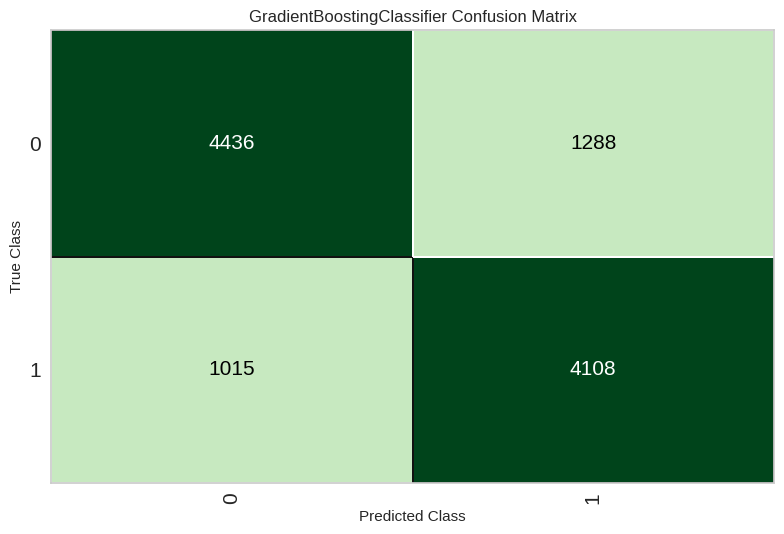

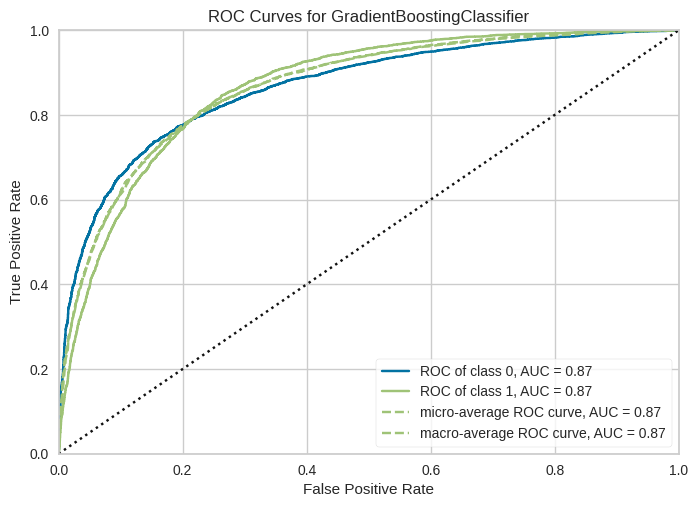

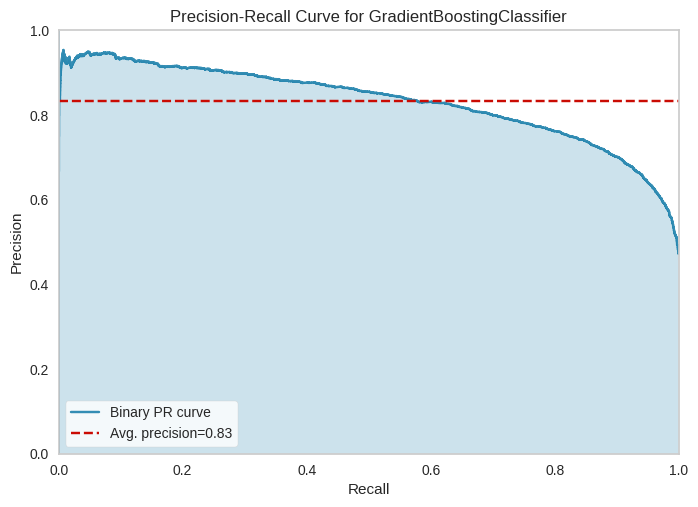

In [ ]:
evaluate_model(best_model)  # Interactive analysis
plot_model(best_model, plot="confusion_matrix")  # Confusion matrix
plot_model(best_model, plot="auc")  # ROC-AUC curve
plot_model(best_model, plot="pr")  # Precision-Recall curve

In [ ]:
predictions = predict_model(best_model, data=test_df)

In [ ]:
test_df

,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Vegetable or Fruit Intake (1+ per Day),BMI_scaled,Age_standardized
0,1,1,1,0,0,0,1,0,1,0,2,0,0,4,20000,1,-0.271212,0.919382
1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,75000,0,0.371212,0.356726
2,1,1,1,1,0,0,0,0,1,0,1,1,0,4,10000,1,1.303030,0.694320
3,0,0,1,1,0,0,0,0,1,0,1,0,0,4,75000,1,-0.280303,-0.262195
4,0,0,1,1,0,0,0,0,1,0,1,0,1,4,35000,1,0.039049,-0.824852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74356,1,0,1,0,0,0,0,0,1,0,1,0,0,4,10000,1,-0.572727,-0.430992
74357,1,1,1,1,0,0,0,0,1,0,1,0,0,2,75000,1,0.248485,0.919382
74358,1,1,1,0,0,1,0,0,1,0,4,1,0,0,20000,1,-0.113636,1.988429
74359,1,1,1,0,1,0,0,0,1,1,3,0,1,5,10000,0,-0.611205,0.244195


In [ ]:
predictions

,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Vegetable or Fruit Intake (1+ per Day),BMI_scaled,Age_standardized,prediction_label,prediction_score
0,1,1,1,0,0,0,1,0,1,0,2,0,0,4,20000,1,-0.271212,0.919382,0,0.5663
1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,75000,0,0.371212,0.356726,0,0.7038
2,1,1,1,1,0,0,0,0,1,0,1,1,0,4,10000,1,1.303030,0.694320,1,0.7287
3,0,0,1,1,0,0,0,0,1,0,1,0,0,4,75000,1,-0.280303,-0.262195,0,0.8662
4,0,0,1,1,0,0,0,0,1,0,1,0,1,4,35000,1,0.039049,-0.824852,0,0.8514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74356,1,0,1,0,0,0,0,0,1,0,1,0,0,4,10000,1,-0.572727,-0.430992,0,0.8280
74357,1,1,1,1,0,0,0,0,1,0,1,0,0,2,75000,1,0.248485,0.919382,1,0.6228
74358,1,1,1,0,0,1,0,0,1,0,4,1,0,0,20000,1,-0.113636,1.988429,1,0.8958
74359,1,1,1,0,1,0,0,0,1,1,3,0,1,5,10000,0,-0.611205,0.244195,1,0.8751


In [ ]:
predictions.nunique()

,0
High Blood Pressure,2
Told High Cholesterol,2
Cholesterol Checked,2
Smoked 100+ Cigarettes,2
Diagnosed Stroke,2
Diagnosed Diabetes,2
Leisure Physical Activity,2
Heavy Alcohol Consumption,2
Health Care Coverage,2
Doctor Visit Cost Barrier,2


In [ ]:
submission_df = pd.read_csv("/content/kaggle_competition/sample_submission.csv")

In [ ]:
submission_df

,ID,History of HeartDisease or Attack
0,test_000001,No
1,test_000002,No
2,test_000003,No
3,test_000004,NaN
4,test_000005,NaN
...,...,...
74356,test_074357,NaN
74357,test_074358,NaN
74358,test_074359,NaN
74359,test_074360,NaN


In [ ]:
submission_df["History of HeartDisease or Attack"] = predictions["prediction_label"]

In [ ]:
submission_df[:30]

,ID,History of HeartDisease or Attack
0,test_000001,0
1,test_000002,0
2,test_000003,1
3,test_000004,0
4,test_000005,0
5,test_000006,1
6,test_000007,1
7,test_000008,1
8,test_000009,1
9,test_000010,0


In [ ]:
predictions[:30]

,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Vegetable or Fruit Intake (1+ per Day),BMI_scaled,Age_standardized,prediction_label,prediction_score
0,1,1,1,0,0,0,1,0,1,0,2,0,0,4,20000,1,-0.271212,0.919382,0,0.5663
1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,75000,0,0.371212,0.356726,0,0.7038
2,1,1,1,1,0,0,0,0,1,0,1,1,0,4,10000,1,1.303030,0.694320,1,0.7287
3,0,0,1,1,0,0,0,0,1,0,1,0,0,4,75000,1,-0.280303,-0.262195,0,0.8662
4,0,0,1,1,0,0,0,0,1,0,1,0,1,4,35000,1,0.039049,-0.824852,0,0.8514
5,1,1,1,1,0,0,0,0,1,0,1,1,0,2,50000,1,0.263636,0.300461,1,0.6345
6,1,0,1,1,0,0,1,0,0,0,0,1,1,5,20000,1,0.886248,2.213491,1,0.7354
7,1,0,1,0,0,0,1,0,1,0,1,0,1,0,10000,0,0.587436,0.863117,1,0.5540
8,1,1,1,1,0,1,0,0,1,0,2,0,0,5,20000,0,-0.478788,1.256976,1,0.6422
9,1,0,1,0,0,0,1,0,1,0,2,0,0,2,20000,1,-0.143939,0.356726,0,0.8180


In [ ]:
mapping = {0: "No", 1: "Yes"}

# Apply mapping to the column
submission_df["History of HeartDisease or Attack"] = submission_df["History of HeartDisease or Attack"].map(mapping)

In [ ]:
submission_df

,ID,History of HeartDisease or Attack
0,test_000001,No
1,test_000002,No
2,test_000003,Yes
3,test_000004,No
4,test_000005,No
...,...,...
74356,test_074357,No
74357,test_074358,Yes
74358,test_074359,Yes
74359,test_074360,Yes


In [ ]:
submission_df.to_csv("submission.csv", index=False)